In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [88]:
cost_of_living_df = pd.read_csv("./cost_of_living_data.csv",index_col="City",
                                encoding="utf-8")

In [132]:
cost_of_living_df.columns

Index(['Meal, Inexpensive Restaurant ',
       'Meal for 2 People, Mid-range Restaurant, Three-course Meal, Inexpensive Restaurant',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (1 pint draught)', 'Imported Beer (12 oz small bottle)',
       'Cappuccino (regular)', 'Coke/Pepsi (12 oz small bottle)',
       'Water (12 oz small bottle)', 'Milk (regular), (1 gallon)',
       'Loaf of Fresh White Bread (1 lb)', 'Rice (white), (1 lb) ',
       'Eggs (regular) (12)', 'Local Cheese (1 lb)',
       'Chicken Breasts (Boneless, Skinless), (1 lb)',
       'Beef Round (1 lb) (or Equivalent Back Leg Red Meat)', 'Apples (1 lb)',
       'Banana (1 lb)', 'Oranges (1 lb)', 'Tomato (1 lb)', 'Potato (1 lb)',
       'Onion (1 lb)', 'Lettuce (1 head)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (12 oz small bottle).1', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)', 

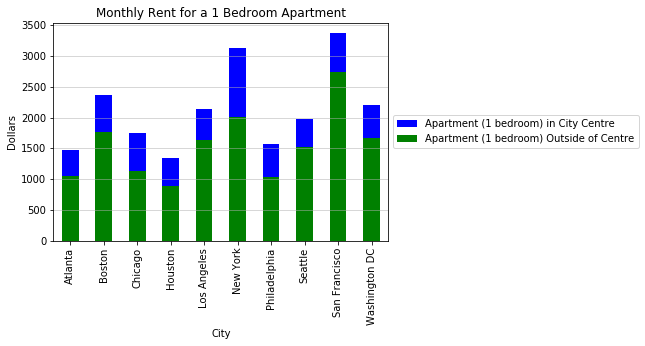

In [123]:
ax = plt.gca()
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) in City Centre',color='b',ax=ax)
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) Outside of Centre',color='g',ax=ax)
plt.xlabel("City")
plt.ylabel("Dollars")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.grid(linewidth=0.5)
plt.title("Monthly Rent for a 1 Bedroom Apartment")
plt.show()

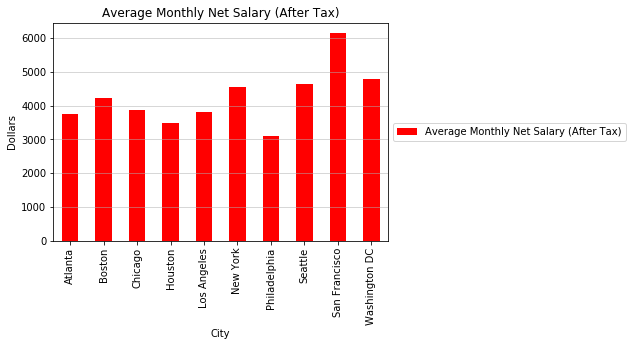

In [131]:
cost_of_living_df.plot(kind='bar',y='Average Monthly Net Salary (After Tax)',color='r')
plt.ylabel("Dollars")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y',linewidth=0.5)
plt.title("Average Monthly Net Salary (After Tax)")
plt.show()

In [ ]:
# NOTES BELOW

In [ ]:
# Alternative plotting method
# x_axis = np.arange(len(cost_of_living_df.index))
# y_values = cost_of_living_df['Apartment (1 bedroom) in City Centre'].astype(float)
# plt.bar(x_axis, y_values, 
#         color='b', alpha=0.5, align="center")
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, cost_of_living_df.index, rotation="vertical")
# plt.ylim(0, max(y_values)+500)
# plt.xlabel("City")
# plt.ylabel("Apartment (1 bedroom) in City Centre")
# plt.show()